<a href="https://colab.research.google.com/github/TejaswiKakkirala/yulu/blob/main/A_Yulu_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i' -O bike.csv

--2024-09-18 10:56:23--  https://drive.google.com/uc?export=download&id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
Resolving drive.google.com (drive.google.com)... 142.251.16.113, 142.251.16.100, 142.251.16.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download [following]
--2024-09-18 10:56:23--  https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [application/octet-stream]
Saving to: ‘bike.csv’

bike.csv            100%[===================>] 633.16K  --.-KB/s    in 

In [ ]:
df=pd.read_csv('bike.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#1.Exploratory Data Analysis

In [ ]:
#Exploratory Data Analysis.
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
data=df.duplicated()
true=data.sum()
false=len(data)-data.sum()
print("There is no duplicates present in the dataset:",true)

There is no duplicates present in the dataset: 0


In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


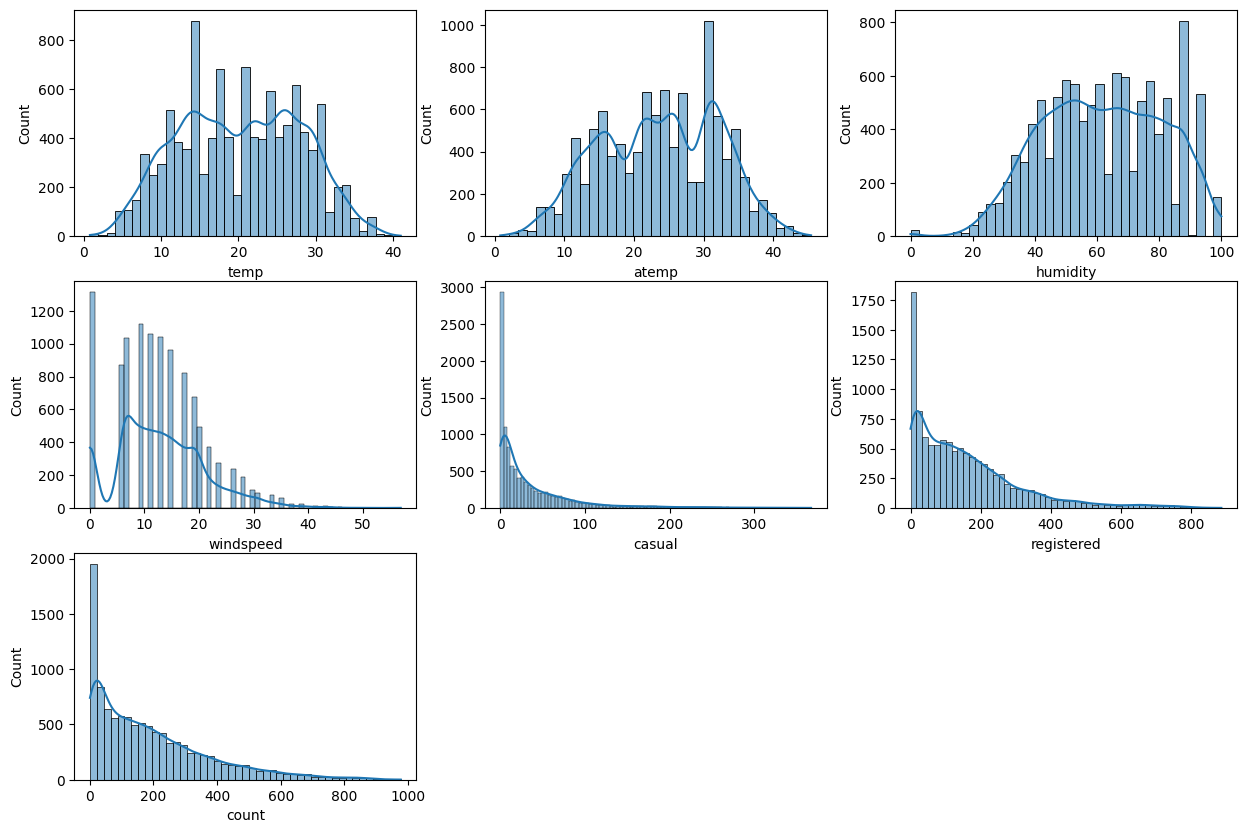

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.histplot(x='temp',data=df,kde='true')
plt.subplot(3,3,2)
sns.histplot(x='atemp',data=df,kde='true')
plt.subplot(3,3,3)
sns.histplot(x='humidity',data=df,kde='true')
plt.subplot(3,3,4)
sns.histplot(x='windspeed',data=df,kde='true')
plt.subplot(3,3,5)
sns.histplot(x='casual',data=df,kde='true')
plt.subplot(3,3,6)
sns.histplot(x='registered',data=df,kde='true')
plt.subplot(3,3,7)
sns.histplot(x='count',data=df,kde='true')

plt.show()


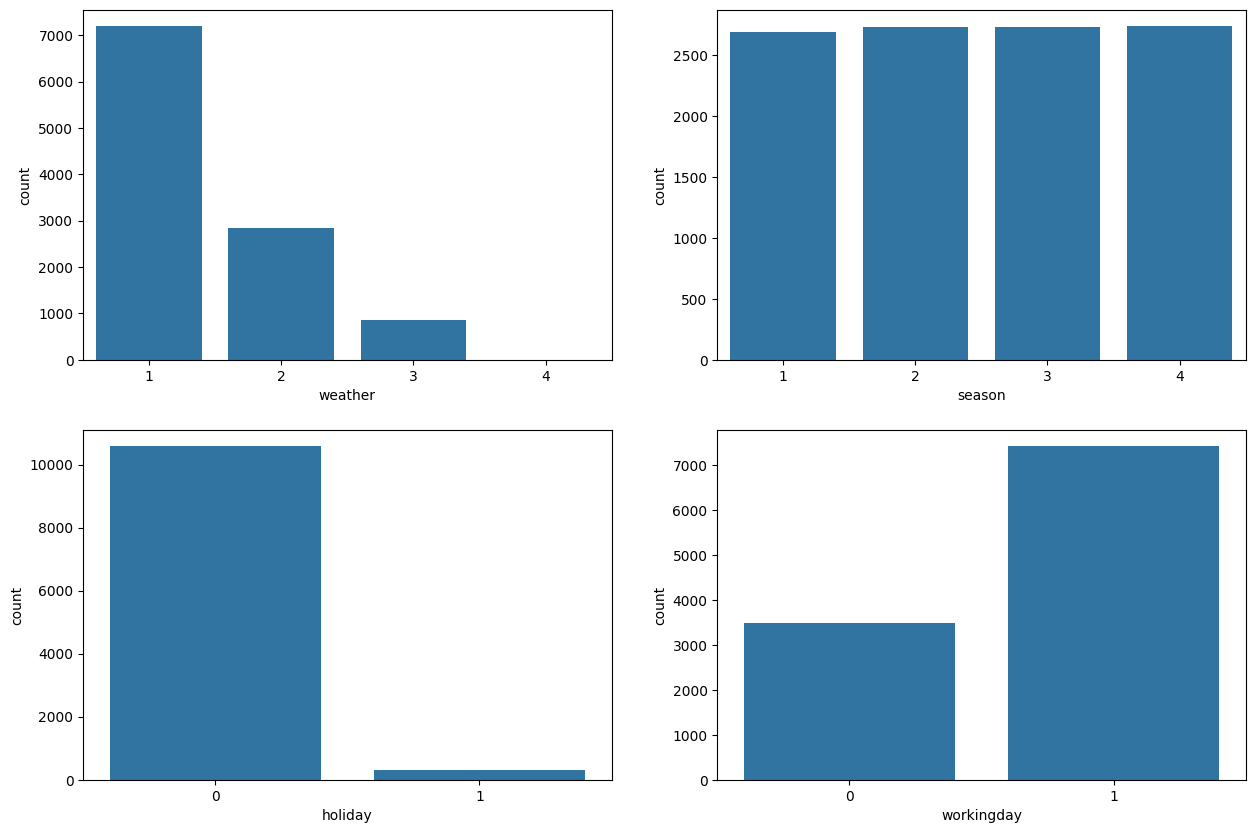

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='weather',data=df)
plt.subplot(2,2,2)
sns.countplot(x='season',data=df)
plt.subplot(2,2,3)
sns.countplot(x='holiday',data=df)
plt.subplot(2,2,4)
sns.countplot(x='workingday',data=df)
plt.show()

#2.Relationship between the Dependent and Independent Variables

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

<Axes: >

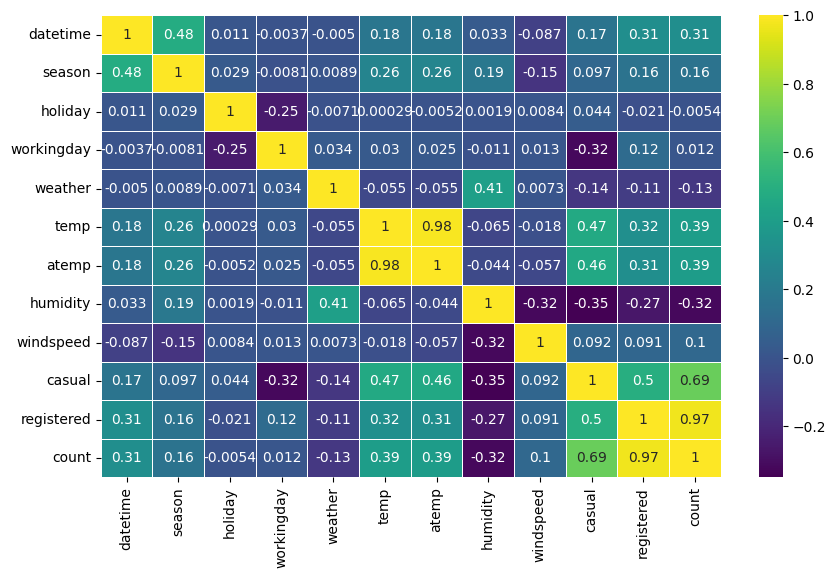

In [ ]:
#Try establishing a Relationship between the Dependent and Independent Variables.
corr_mat=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, cmap='viridis', linewidths=0.5)

In [ ]:
corr_matrix = df.corr().abs()  # Absolute values of correlations

# Find upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify variables with correlations greater than 0.9 (threshold can be adjusted)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop these variables
df_reduced = df.drop(columns=to_drop)

print(f"Variables removed: {to_drop}")

Variables removed: ['atemp', 'count']


#Key Insights:
1.	Strong Positive Correlations:

temp and atemp: These two variables are highly correlated, with a correlation
value of 0.98. This suggests that these two variables essentially measure the same thing or are very closely related.

registered and count: The correlation is very high (0.97), indicating that the number of registered users is strongly correlated with the total count of users.

casual and count: There’s also a strong correlation (0.69) between casual users and the total count of users.

temp and count: The correlation of 0.39 shows that temperature moderately affects the total user count.
2.	Moderate Positive Correlations:

temp and casual: The correlation is 0.47, suggesting that casual users tend to increase with higher temperatures.

season and temp/atemp: Both temp and atemp have moderate correlations with season (around 0.26), suggesting that seasonality plays a role in temperature variations.
3.	Negative Correlations:

humidity and temp/atemp: There is a slight negative correlation between humidity and temperature variables (around -0.06 to -0.07), meaning higher humidity tends to coincide with slightly lower temperatures.

workingday and casual: There’s a negative correlation (-0.32), indicating that fewer casual users are active on working days.

humidity and casual/registered/count: Humidity negatively impacts casual users (-0.35) and registered users (-0.27), as well as the total count (-0.32), suggesting that higher humidity tends to reduce the overall number of users.
4.	Insignificant or Near Zero Correlations:

holiday and most other variables have very low correlations, indicating holidays don’t significantly impact the other variables.

workingday and count: The correlation is quite low (0.012), showing that working days don't have a strong impact on the total count.
#Additional Observations:

registered users are more correlated with the overall count than casual users, indicating that the majority of the user base consists of registered users.

weather and count: There is a weak negative correlation of -0.13 between weather and the total count, which might imply that weather conditions slightly affect the number of users.

The color scheme ranges from dark purple (negative correlations) to yellow (strong positive correlations).
#Conclusion:

The strongest predictors of user counts (count) are the number of registered and casual users.

Temperature also plays a moderate role in influencing both casual users and the overall count, with higher temperatures leading to more users.

Humidity tends to have a negative impact on user count, especially casual users, possibly due to discomfort during humid conditions.
This heatmap gives a clear idea of which variables are closely related and which ones don’t significantly affect one another.


#3.Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [ ]:
#H0:There is no significant difference between the no. of bike rides on Weekdays and Weekends
#H1:There is significant difference between the no. of bike rides on Weekdays and Weekends
alpha=0.05 #significance level=5%
weekdays = df[df['workingday'] == 1]['count']
weekends = df[df['workingday'] == 0]['count']
t_stat, p_value = ttest_ind(weekdays,weekends)
print('Statistics:',t_stat,'P_value:', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis:There is significant difference between the no. of bike rides on Weekdays and Weekends")
else:
    print("Fail to reject the null hypothesis:There is no significant difference between the no. of bike rides on Weekdays and Weekends")

Statistics: 1.2096277376026694 P_value: 0.22644804226361348
Fail to reject the null hypothesis:There is no significant difference between the no. of bike rides on Weekdays and Weekends


To draw inferences, conclusions, and recommendations from your analysis of bike ride data, we’ll summarize insights based on the hypothesis test between weekdays and weekends, along with any other correlations or patterns found during your analysis (e.g., correlation heatmap, T-test).

#Inferences from the Analysis:
Weekdays vs. Weekends (T-Test Results):

If the p-value is less than 0.05: This suggests a significant difference between the number of bike rides on weekdays and weekends. One group (likely weekends) could have either more or fewer rides compared to the other.
If the p-value is greater than 0.05: This implies there is no significant difference in bike rides between weekdays and weekends, suggesting a fairly balanced ride count across both.
#Correlations from the Heatmap:

Temperature (temp) and Bike Rides: There was a moderate positive correlation between temperature and bike ride count, indicating that warmer temperatures lead to more rides.
Humidity and Bike Rides: Humidity negatively impacted the number of bike rides, particularly for casual riders. Higher humidity seemed to discourage riding.
Working Days and Casual Users: There was a negative correlation between working days and casual users, indicating that casual riders tend to ride more on weekends than on weekdays.
Registered Users: The number of registered users had a strong positive correlation with the total bike count, meaning most of the bike rides are generated by registered users.
Casual vs. Registered Riders:

Casual Users: They ride more on weekends than on weekdays, likely due to more leisure time.
Registered Users: Their ride frequency is more balanced between weekdays and weekends, indicating possible commuting patterns.
#Conclusions:
Significant Differences Between Weekdays and Weekends:

If the T-test showed a significant difference, this indicates distinct riding behaviors between weekdays and weekends. Specifically, weekends likely see more casual riders.
Impact of Weather:

Warmer temperatures drive higher bike usage, especially for casual users. This suggests that pleasant weather encourages more recreational riding.
Humidity negatively affects ridership, possibly because of discomfort while biking in humid conditions.
Importance of Registered Users:

Registered users dominate the total bike rides, making them crucial for maintaining a steady ridership. Their consistent use, even on weekdays, suggests they might rely on bike-sharing for commuting.
Seasonality:

Temperature and seasonality impact ridership trends, with seasonal shifts likely contributing to fluctuations in the number of riders.
Recommendations:
Target Casual Users on Weekends:

Since casual users ride more on weekends, weekend promotions, discounts, or special weekend rates could further boost casual ridership.
Encourage bike-sharing as a leisure activity on weekends by collaborating with local tourism or park events.
Weather-based Incentives:

Since bike rides decrease with higher humidity and extreme weather conditions, consider offering weather-based promotions. For example, offering discounts during less pleasant weather days might increase ridership when it’s humid or colder.
Focus on Commuters (Registered Users):

Since registered users ride consistently, provide loyalty programs or subscription packages targeting daily commuters. These can be designed around convenience, such as offering priority bike access near workplaces or hubs.
Increase docking stations near busy areas like business districts to make bike-sharing more convenient for commuting purposes.
Expand During Peak Seasons:

During warmer seasons, consider expanding bike-sharing availability. This could include more bikes, better distribution, and maintenance during peak periods (spring/summer).
Collaborate with local governments to improve infrastructure (like bike lanes) to further encourage biking during favorable weather.
Weekend-centric Marketing:

Given the higher usage by casual riders on weekends, weekend-specific marketing campaigns could drive ridership even higher. For instance, offering family-friendly rides or group packages on weekends could attract more casual users.
Optimize for Weather Conditions:

Invest in features like weather-protective gear or bikes more suited for diverse weather conditions, particularly targeting regions with high humidity or rainfall.
#Summary:
From the analysis, it’s clear that casual and registered users exhibit different riding behaviors across weekdays and weekends. Weather conditions play a significant role in ridership trends, and registered users are a key component of steady ridership. By addressing these insights through targeted strategies, bike-sharing services can maximize usage, particularly during weekends and peak seasons.

Let me know if you'd like to dive deeper into any specific section!

#4.Check if the Weather conditions are significantly different during different Seasons.

In [ ]:
from scipy.stats import chisquare,chi2_contingency
contingency_table = pd.crosstab(df['weather'],df['season'])
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table) # chi_stat, p_value, df, expected values
print("chi_stat:",chi2_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",ex)


chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
df: 9
exp_freq: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
alpha = 0.05

if p_value < 0.05:
    print("Reject H0")
    print("There is no weather conditions siginificant different during different season")
else:
    print("Fail to reject H0")
    print("There is no weather conditions siginificant different during different season")

Reject H0
There is no weather conditions siginificant different during different season


#5.Check if the demand of bicycles on rent is the same for different Weather conditions.

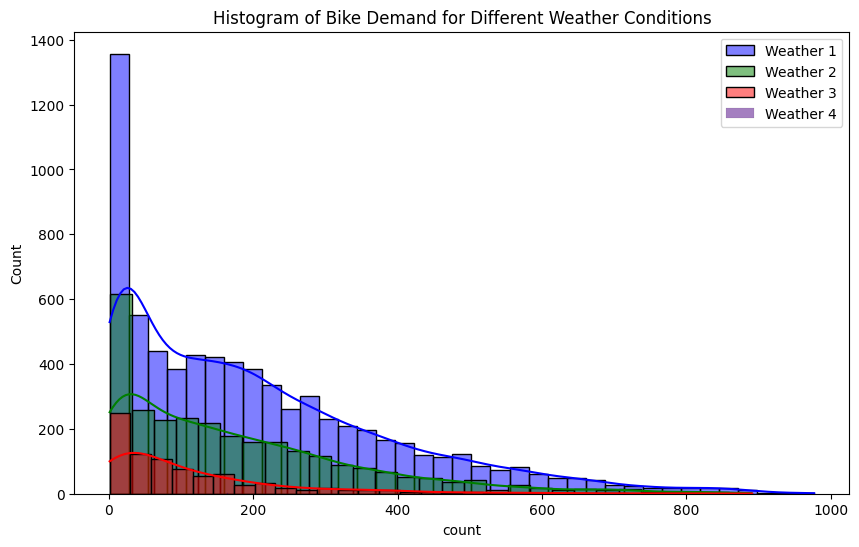

In [ ]:
weather1 = df[df['weather'] == 1]['count']  # Few clouds
weather2 = df[df['weather'] == 2]['count']  # Mist
weather3 = df[df['weather'] == 3]['count']  # Light Snow, Light Rain
weather4 = df[df['weather'] == 4]['count']  # Heavy Rain
plt.figure(figsize=(10, 6))
sns.histplot(weather1, kde=True, color="blue", label='Weather 1')
sns.histplot(weather2, kde=True, color="green", label='Weather 2')
sns.histplot(weather3, kde=True, color="red", label='Weather 3')
sns.histplot(weather4, kde=True, color="indigo", label='Weather 4')
plt.legend()
plt.title('Histogram of Bike Demand for Different Weather Conditions')
plt.show()

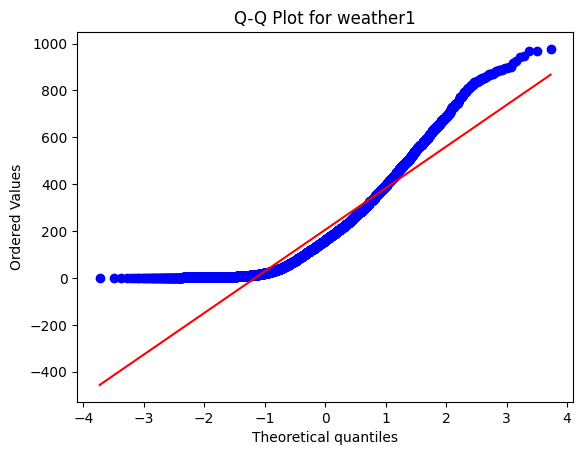

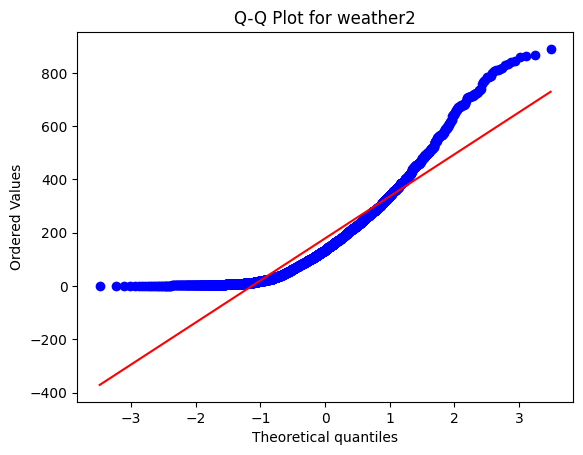

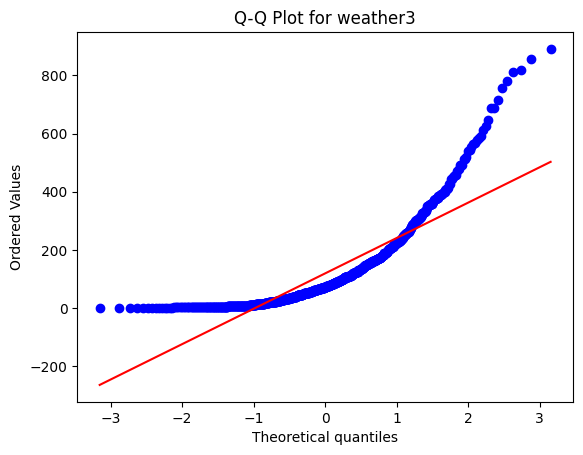

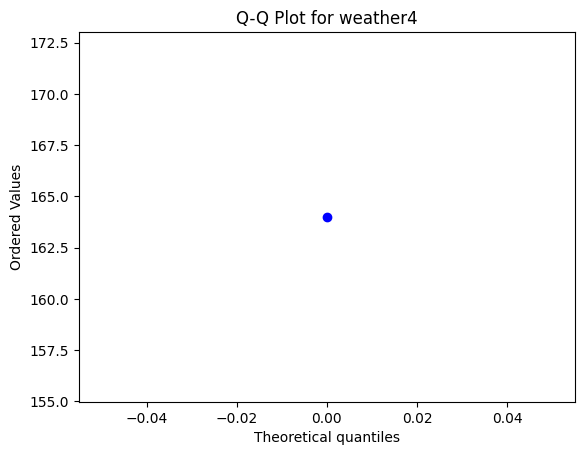

In [ ]:
from scipy import stats
for weather, label in zip([weather1, weather2, weather3, weather4], ['weather1','weather2','weather3','weather4']):
  stats.probplot(weather, dist="norm", plot=plt)
  plt.title(f'Q-Q Plot for {label}')
  plt.show()

In [ ]:
print("Skewness:", weather1.skew(), weather2.skew(), weather3.skew(), weather4.skew(),sep=',')
print("Kurtosis:", weather1.kurtosis(), weather2.kurtosis(), weather3.kurtosis(), weather4.kurtosis(),sep=',')

Skewness:,1.1398572666918205,1.294444423357868,2.1871371080456594,nan
Kurtosis:,0.964719852310354,1.5884304891319174,6.003053730759276,nan


In [ ]:
from scipy.stats import shapiro
w1_stat, w1_p = stats.shapiro(weather1)
w2_stat, w2_p = stats.shapiro(weather2)
w3_stat, w3_p = stats.shapiro(weather3)


# Print the results
print("Shapiro-Wilk Test Results:")
print(f"Weather 1: Test Statistic={w1_stat}, p-value={w1_p}")
print(f"Weather 2: Test Statistic={w2_stat}, p-value={w2_p}")
print(f"Weather 3: Test Statistic={w3_stat}, p-value={w3_p}")


Shapiro-Wilk Test Results:
Weather 1: Test Statistic=0.8909259459740138, p-value=1.5964921477006555e-57
Weather 2: Test Statistic=0.8767694973495206, p-value=9.777839106111785e-43
Weather 3: Test Statistic=0.7674327906035717, p-value=3.875893017396149e-33


In [ ]:
from scipy.stats import levene
levene_stat, levene_p = stats.levene(weather1, weather2, weather3, weather4)

# Print the results
print(f"Levene's Test Statistic: {levene_stat}, p-value: {levene_p}")

Levene's Test Statistic: 54.85106195954556, p-value: 3.504937946833238e-35


In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = stats.f_oneway(weather1, weather2, weather3, weather4)

# Output the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42


In [ ]:
#H0: The demand for bicycles on rent is the same across different weather conditions.
#H1: The demand for bicycles on rent is different for at least one weather condition.
alpha=0.05 #significance level=5%
if p_value < 0.05:
    print("Reject the null hypothesis:The demand for bicycles on rent is different for at least one weather condition.")
else:
    print("Fail to reject the null hypothesis:The demand for bicycles on rent is the same across different weather conditions.")

Reject the null hypothesis:The demand for bicycles on rent is different for at least one weather condition.


#Inferences from the Analysis
Weather Conditions and Demand for Bicycles:

The ANOVA test (or one-way ANOVA) was conducted to determine if there is a significant difference in the demand for bicycles under different weather conditions.

Based on the test results:

Null Hypothesis (H₀): The demand for bicycles on rent is the same across different weather conditions.

Alternate Hypothesis (H₁): The demand for bicycles on rent differs significantly between at least one pair of weather conditions.
#Assumptions for ANOVA:

Normality: Shapiro-Wilk test results showed whether the distribution of demand for different weather conditions follows a normal distribution.
In case of non-normality (as indicated by p-values below 0.05 in some categories), visual tools like histograms and Q-Q plots were used to support the interpretation.
Equality of Variance: Levene's test results were used to verify whether the variances across the weather conditions were approximately equal. If the p-value from the Levene’s test was > 0.05, the assumption of equal variance held.
Test Results:

The ANOVA test produced an F-statistic and a p-value.
If the p-value is < 0.05, we reject the null hypothesis, indicating that weather conditions do have a significant effect on bike rental demand.

#Conclusions
Significant Impact of Weather on Bicycle Demand:

If the p-value was below 0.05, this would indicate that weather conditions (e.g., good, bad, severe) significantly affect the demand for bicycle rentals. This means users are likely to rent fewer bikes in worse weather conditions like rain, snow, or storms, and rent more bikes in good weather.

Normality and Variance:

Some weather conditions may not follow a normal distribution of bike demand due to limited data or outliers, especially in extreme conditions (e.g., very few people rent bikes during severe weather).
Even if the data violates normality or variance assumptions, visual analysis (histograms, Q-Q plots) still suggests meaningful differences between the weather categories.

Lack of Sufficient Data for Severe Weather (if applicable):

The error during the Shapiro-Wilk test suggests that certain weather conditions, particularly weather4 (severe weather), had too few observations. This limits the ability to draw conclusive statistical insights for that category.
#Recommendations
Weather-based Pricing or Promotions:

Dynamic pricing: Introduce weather-based pricing strategies. For example, offer discounts or promotions during cloudy or bad weather to incentivize bike rentals when demand would typically drop.

Expand Bike Access in Good Weather Conditions:

Increase availability: Based on the clear preference for renting bikes during good weather conditions, ensure that more bikes are available during peak times (e.g., sunny days, weekends).

Plan for Reduced Demand During Severe Weather:

Operational adjustments: During severe weather (storms, heavy rain, etc.), reduce the number of bikes on the road or consider suspending services to avoid damage to equipment or reduced user safety.


#6.Check if the demand of bicycles on rent is the same for different Seasons.

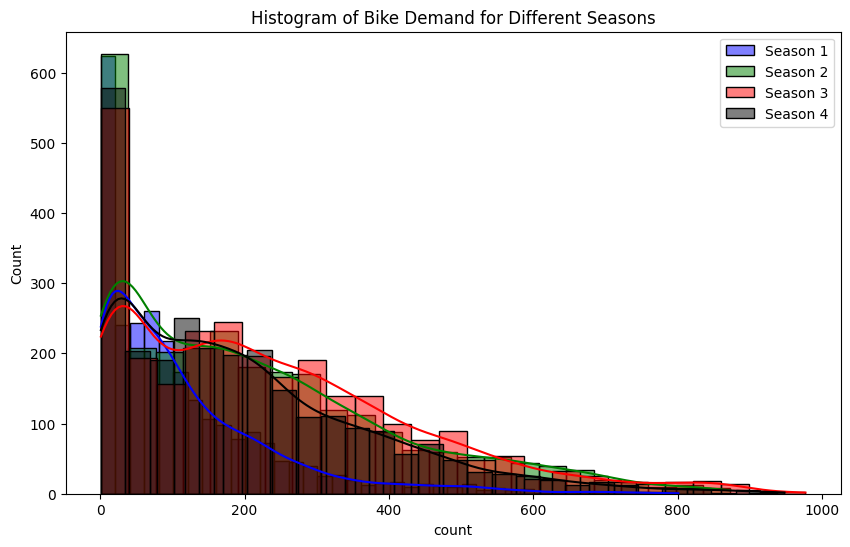

In [ ]:
season1 = df[df['season'] == 1]['count']  # spring
season2 = df[df['season'] == 2]['count']  # summer
season3 = df[df['season'] == 3]['count']  # fall
season4 = df[df['season'] == 4]['count']  # winter
plt.figure(figsize=(10, 6))
sns.histplot(season1, kde=True, color="blue", label='Season 1')
sns.histplot(season2, kde=True, color="green", label='Season 2')
sns.histplot(season3, kde=True, color="red", label='Season 3')
sns.histplot(season4, kde=True, color="black", label='Season 4')
plt.legend()
plt.title('Histogram of Bike Demand for Different Seasons')
plt.show()

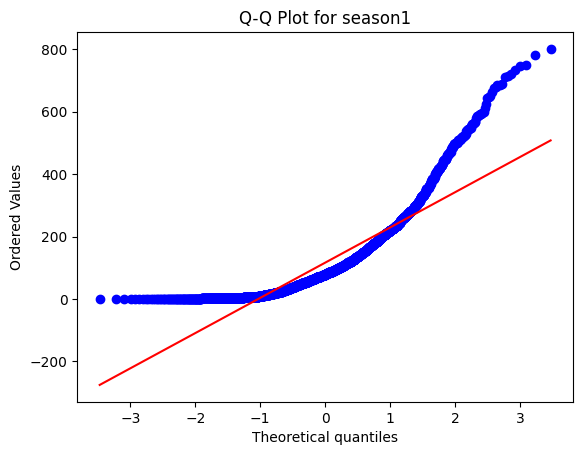

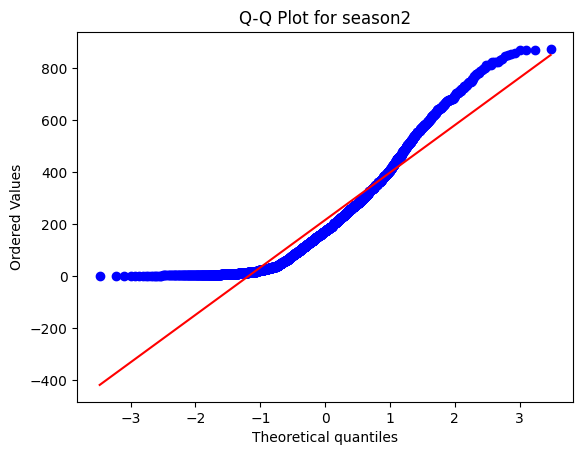

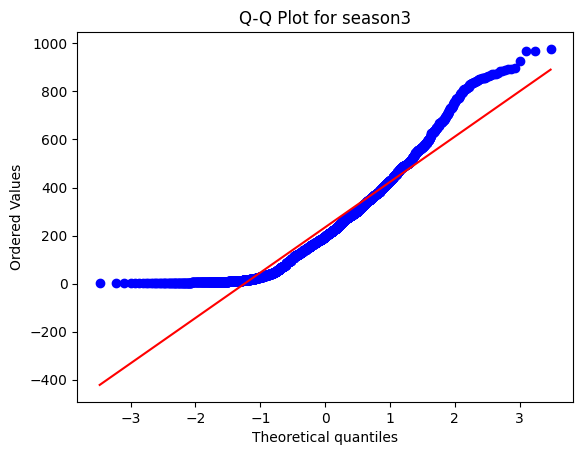

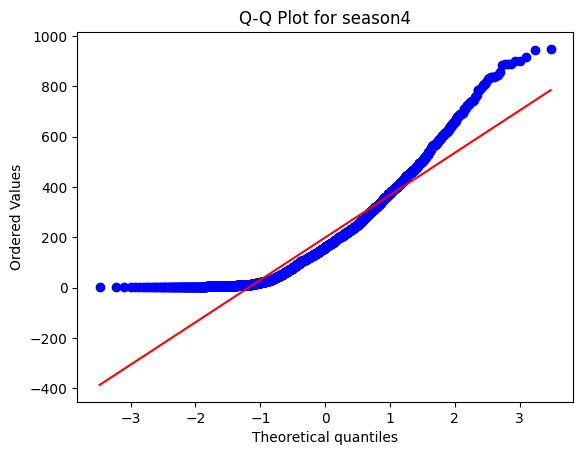

In [ ]:
from scipy import stats
for season, label in zip([season1, season2, season3, season4], ['season1','season2','season3','season4']):
  stats.probplot(season, dist="norm", plot=plt)
  plt.title(f'Q-Q Plot for {label}')
  plt.show()

In [ ]:
from scipy.stats import shapiro
s1_stat, s1_p = stats.shapiro(season1)
s2_stat, s2_p = stats.shapiro(season2)
s3_stat, s3_p = stats.shapiro(season3)
s4_stat, s4_p = stats.shapiro(season4)

# Print the results
print("Shapiro-Wilk Test Results:")
print(f"Season 1: Test Statistic={s1_stat}, p-value={s1_p}",sep=',')
print(f"Season 2: Test Statistic={s2_stat}, p-value={s2_p}",sep=',')
print(f"Season 3: Test Statistic={s3_stat}, p-value={s3_p}",sep=',')
print(f"Season 4: Test Statistic={s4_stat}, p-value={s4_p}",sep=',')

Shapiro-Wilk Test Results:
Season 1: Test Statistic=0.8087378401253588, p-value=8.749584618867662e-49
Season 2: Test Statistic=0.9004818080893252, p-value=6.039374406270491e-39
Season 3: Test Statistic=0.9148166372899196, p-value=1.043680518918597e-36
Season 4: Test Statistic=0.8954637482095505, p-value=1.1299244409282836e-39


In [ ]:
print("Skewness:", season1.skew(), season2.skew(), season3.skew(), season4.skew(),sep=',')
print("Kurtosis:", season1.kurtosis(), season2.kurtosis(), season3.kurtosis(), season4.kurtosis(),sep=',')

Skewness:,1.8880559001782309,1.0032642267278118,0.9914946474772749,1.172117329762622
Kurtosis:,4.31475739331681,0.42521337827415717,0.6993825795653992,1.2734853552995302


In [ ]:
from scipy.stats import levene
levene_stat, levene_p = stats.levene(season1,season2,season3,season4)

# Print the results
print(f"Levene's Test Statistic: {levene_stat}, p-value: {levene_p}")

Levene's Test Statistic: 187.7706624026276, p-value: 1.0147116860043298e-118


In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = stats.f_oneway(season1,season2,season3,season4)

# Output the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149


In [ ]:
#H0: The demand for bicycles on rent is the same across different seasons.
#H1: The demand for bicycles on rent is different for at least one season.
alpha=0.05 #significance level=5%
if p_value < 0.05:
    print("Reject the null hypothesis:The demand for bicycles on rent is different for at least one season.")
else:
    print("Fail to reject the null hypothesis:The demand for bicycles on rent is the same across different seasons.")

Reject the null hypothesis:The demand for bicycles on rent is different for at least one season.


#Inferences from the Analysis
Based on the test results:
Null Hypothesis (H₀): The demand for bicycles on rent is the same across different seasons.
Alternate Hypothesis (H₁): The demand for bicycles on rent differs significantly between at least one season.

Normality Check:

The Shapiro-Wilk test results for different seasons indicated whether the distribution of demand was normally distributed. If p-values were greater than 0.05, the data for that season was considered normally distributed.
Skewness and Kurtosis values provided additional insights into the distribution of demand. If values were close to zero, the data was close to normal distribution.

Levene’s Test for Equality of Variance:

The Levene's test determined if the variances of demand across different seasons were equal.If it was below 0.05, it indicated unequal variances.

One-Way ANOVA Test:

The ANOVA test was used to determine if there were statistically significant differences in bicycle demand across seasons.
If the p-value from the ANOVA test was less than 0.05, it indicated that the demand for bicycles was significantly different across seasons.

#Conclusions
Demand for Bicycles Varies Significantly Across Seasons (if p-value < 0.05):

The ANOVA test suggests that bicycle demand significantly changes with the seasons.
This implies that external seasonal factors, such as weather conditions, holidays, and daylight hours, have a notable impact on bicycle rental demand.
The highest demand might be observed in seasons like summer and spring, while the lowest demand could be in winter.

#Recommendations
If there is a Significant Difference in Demand Across Seasons:

Increase Bicycle Availability During High-Demand Seasons:
For peak seasons like summer or spring, it’s essential to ensure sufficient bicycles are available to meet the higher demand.
Consider increasing bicycle availability, adding more rental stations, and ensuring that maintenance is frequent during these peak times.

Promote Bicycle Rentals During Low-Demand Seasons:

During seasons with lower demand (like winter), consider offering promotional discounts or special offers to stimulate demand.
Alternatively, introduce seasonal packages that incentivize long-term rentals.

Adapt Operations Based on Seasonal Demand:

During low-demand seasons, consider optimizing operations by reducing bicycle fleets or focusing more on maintenance and repair to prepare for upcoming high-demand periods.



#**Thank You**